1.資料前處理

1-1載入模組與資料讀取

In [217]:
import pandas as pd
import numpy as np
      

In [218]:
df=pd.read_csv("winequality-white.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [219]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [220]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [221]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

1-2將預選為"決策樹分析"的類別做資料篩選

In [222]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [223]:
import matplotlib.pyplot as plt  
import seaborn as sns

<AxesSubplot:>

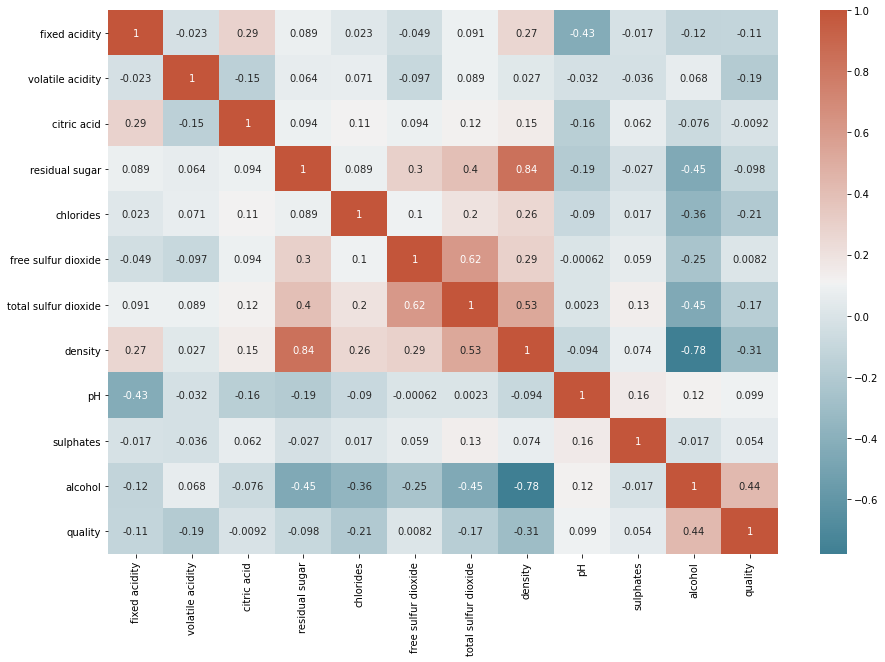

In [224]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:ylabel='Frequency'>

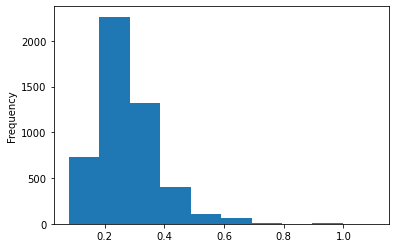

In [225]:
df["volatile acidity"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

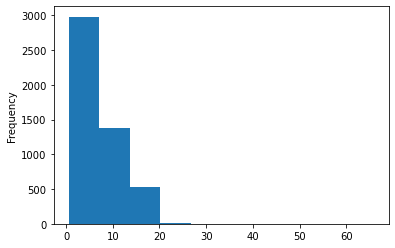

In [226]:
df['residual sugar'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

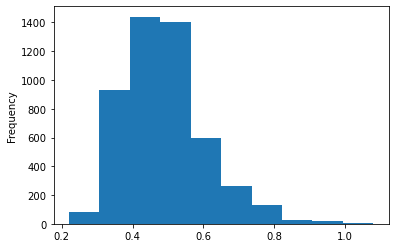

In [227]:
df["sulphates"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

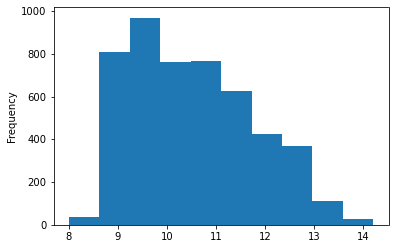

In [229]:
df["alcohol"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

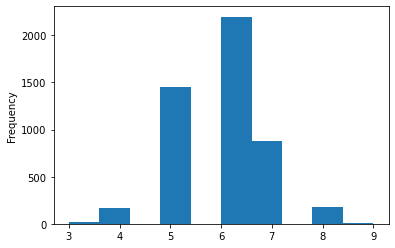

In [230]:
df["quality"].plot.hist()

2.決策樹

2.1決策樹(一)

In [231]:
df_2=pd.read_csv("winequality-white.csv")

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import pydot

In [233]:
from six import StringIO

In [234]:
x=df_2.drop('quality',axis=1)
y=df_2['quality']

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [236]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [237]:
y_prediction = classifier.predict(x_test)

2-2決策樹(一)績效評估

In [238]:
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[  0   1   0   2   0   0   0]
 [  0  14   8  10   6   0   0]
 [  2   8 174  83  14   2   0]
 [  3   6  89 310  40  14   0]
 [  0   2  10  34  98   9   0]
 [  0   1   4   8  11  15   0]
 [  0   0   0   1   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.44      0.37      0.40        38
           5       0.61      0.61      0.61       283
           6       0.69      0.67      0.68       462
           7       0.58      0.64      0.61       153
           8       0.38      0.38      0.38        39
           9       0.00      0.00      0.00         2

    accuracy                           0.62       980
   macro avg       0.38      0.38      0.38       980
weighted avg       0.62      0.62      0.62       980



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [239]:
dot_data=StringIO()

In [240]:
tree.export_graphviz(classifier,
        out_file=dot_data,
        feature_names=['fixed acidity','volatile acidity','citric acid','residual sugar',
       'chlorides','free sulfur dioxide','total sulfur dioxide','density',
       'pH','sulphates','alcohol'],
        class_names=['3','4','5','6','7','8','9'],
        filled=True, rounded=True,
        impurity=False)

In [241]:
diagram = pydot.graph_from_dot_data(dot_data.getvalue())

In [242]:
diagram[0].write_pdf("C:/Users/Wesley/Desktop/DM/Winequality01.pdf")

2-3畫出決策樹(一)

[Text(183.80222202135252, 213.41333333333333, 'X[10] <= 10.625\ngini = 0.677\nsamples = 3918\nvalue = [17, 125, 1174, 1736, 727, 136, 3]'),
 Text(83.54463104015775, 205.36, 'X[1] <= 0.237\ngini = 0.623\nsamples = 2283\nvalue = [10, 94, 988, 969, 195, 26, 1]'),
 Text(23.303658237171618, 197.30666666666667, 'X[10] <= 9.15\ngini = 0.615\nsamples = 841\nvalue = [4, 14, 206, 459, 137, 21, 0]'),
 Text(7.397986741959245, 189.25333333333333, 'X[0] <= 6.75\ngini = 0.704\nsamples = 186\nvalue = [1, 2, 45, 76, 47, 15, 0]'),
 Text(3.370193960225878, 181.2, 'X[8] <= 3.235\ngini = 0.457\nsamples = 68\nvalue = [1, 0, 22, 45, 0, 0, 0]'),
 Text(1.8083967591455932, 173.14666666666668, 'X[2] <= 0.175\ngini = 0.245\nsamples = 42\nvalue = [0, 0, 6, 36, 0, 0, 0]'),
 Text(1.4795973483918488, 165.09333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0, 0]'),
 Text(2.137196169899337, 165.09333333333333, 'X[2] <= 0.55\ngini = 0.18\nsamples = 40\nvalue = [0, 0, 4, 36, 0, 0, 0]'),
 Text(1.315197643014

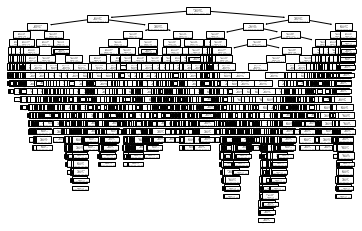

In [243]:
tree.plot_tree(classifier)

3.修剪

In [244]:
import matplotlib.pyplot as plt

In [245]:
clean= DecisionTreeClassifier(random_state=0)
path = clean.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

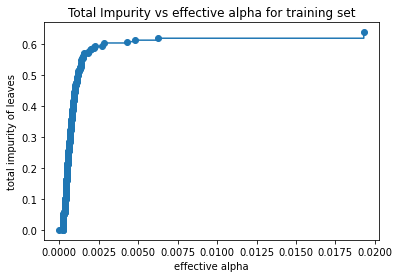

In [246]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [247]:
tras = []
for ccp_alpha in ccp_alphas:
    tra = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tra.fit(x_train, y_train)
    tras.append(tra)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      tras[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04011207827963659


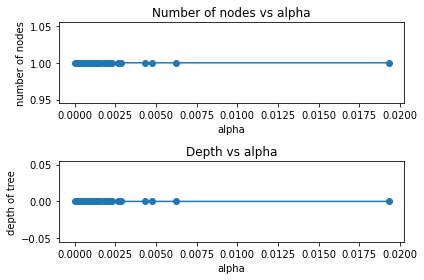

In [248]:
tras = tras[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [tra.tree_.node_count for clf in tras]
depth = [tra.tree_.max_depth for clf in tras]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

4.alpha=0.04時將過度訓練

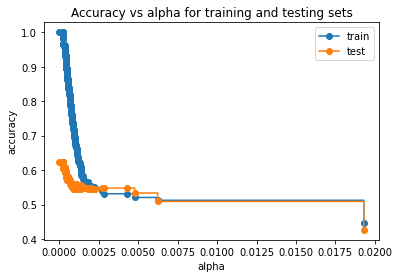

In [249]:
train_scores = [tra.score(x_train, y_train) for tra in tras]
test_scores = [tra.score(x_test, y_test) for tra in tras]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

5.修剪後的決策樹

In [250]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import pydot

In [251]:
x= df.drop('quality', axis=1)
y= df['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [252]:
classifier = DecisionTreeClassifier(ccp_alpha=0.004)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004)

In [253]:
y_predict = classifier.predict(x_test)

6.分類結果

In [254]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[  0   0   0   1   0   0   0]
 [  0   0  17  13   0   0   0]
 [  0   0 193  97   1   0   0]
 [  0   0 146 273  23   0   0]
 [  0   0  12 125  36   0   0]
 [  0   0   0  30  10   0   0]
 [  0   0   0   2   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        30
           5       0.52      0.66      0.59       291
           6       0.50      0.62      0.56       442
           7       0.51      0.21      0.30       173
           8       0.00      0.00      0.00        40
           9       0.00      0.00      0.00         3

    accuracy                           0.51       980
   macro avg       0.22      0.21      0.21       980
weighted avg       0.47      0.51      0.48       980



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
dot_data = StringIO()

In [264]:
tree.export_graphviz(classifier,
        out_file=dot_data,
        feature_names=['fixed acidity','volatile acidity','citric acid','residual sugar',
       'chlorides','free sulfur dioxide','total sulfur dioxide','density',
       'pH','sulphates','alcohol'],
        class_names=['3','4','5','6','7','8','9'],
        filled=True, rounded=True,
        impurity=False)

7.決策樹結論

In [265]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

In [266]:
graph[0].write_pdf("C:/Users/Wesley/Desktop/DM/Winequality.pdf")

[Text(186.0, 195.696, 'X[10] <= 10.85\ngini = 0.676\nsamples = 3918\nvalue = [19, 133, 1166, 1756, 707, 135, 2]'),
 Text(111.60000000000001, 152.208, 'X[1] <= 0.287\ngini = 0.627\nsamples = 2453\nvalue = [12, 104, 1025, 1066, 218, 27, 1]'),
 Text(74.4, 108.72, 'X[1] <= 0.207\ngini = 0.626\nsamples = 1544\nvalue = [8, 41, 487, 783, 197, 27, 1]'),
 Text(37.2, 65.232, 'gini = 0.613\nsamples = 580\nvalue = [2, 9, 112, 322, 117, 18, 0]'),
 Text(111.60000000000001, 65.232, 'X[10] <= 9.85\ngini = 0.612\nsamples = 964\nvalue = [6, 32, 375, 461, 80, 9, 1]'),
 Text(74.4, 21.744, 'gini = 0.586\nsamples = 567\nvalue = [4, 18, 271, 242, 30, 2, 0]'),
 Text(148.8, 21.744, 'gini = 0.61\nsamples = 397\nvalue = [2, 14, 104, 219, 50, 7, 1]'),
 Text(148.8, 108.72, 'gini = 0.547\nsamples = 909\nvalue = [4, 63, 538, 283, 21, 0, 0]'),
 Text(260.40000000000003, 152.208, 'X[10] <= 12.55\ngini = 0.652\nsamples = 1465\nvalue = [7, 29, 141, 690, 489, 108, 1]'),
 Text(223.20000000000002, 108.72, 'gini = 0.642\nsam

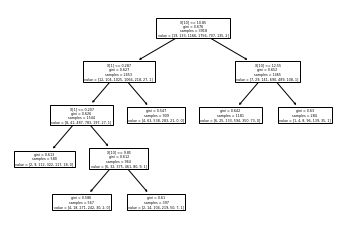

In [267]:
tree.plot_tree(classifier)